In [1]:
print('_')

_


In [1]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#!pip install folium

In [3]:
df = pd.read_csv(r"./uberdataset/uber_clean.csv")
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [4]:
x = df[['Lat', 'Lon']]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [14]:
model = KMeans(n_clusters=3, n_init='auto')
y_kmeans = model.fit_predict(x)

In [6]:
df['y'] = y_kmeans
df.head()

,Date/Time,Lat,Lon,Base,Date,y
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,1
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,1
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,2
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,1
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,2


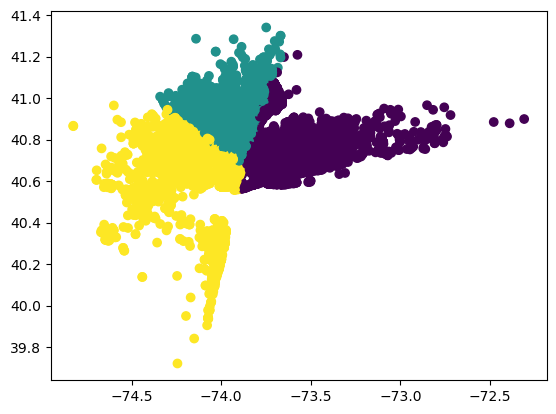

In [7]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

In [13]:
# Store the WCSS(Within-Cluster Sum of Squares) values for different numbers of clusters
# inertia_float: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, n_init='auto')
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

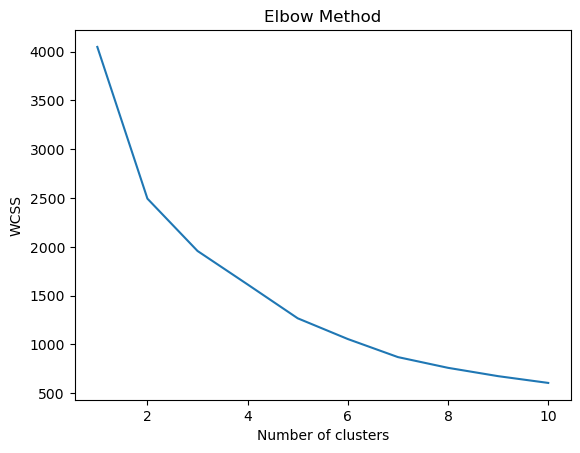

In [9]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# The WCSS decreases as the number of clusters increases.

# The "elbow point" might be around 3 or 4 clusters, where the decrease in WCSS starts to level off.

The Elbow Method is used to determine the optimal number of clusters in a dataset when performing clustering analysis, particularly with algorithms like KMeans. Here are the key reasons why the Elbow Method is widely used:

1. Determining the Optimal Number of Clusters
Clustering Quality: The primary goal of clustering is to group similar data points together in such a way that the intra-cluster similarity is high and the inter-cluster similarity is low. The Elbow Method helps in finding the number of clusters that best achieves this goal.

Avoiding Overfitting: Using too many clusters can lead to overfitting, where each cluster contains very few data points, making the model too specific to the training data. The Elbow Method helps in finding a balance.

2. Visualizing the Trade-off
WCSS vs. Number of Clusters: The Elbow Method involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. This plot visually shows the trade-off between the number of clusters and the compactness of the clusters.

Elbow Point: The "elbow point" in the plot is the point where the rate of decrease in WCSS sharply changes. This point indicates the optimal number of clusters where adding more clusters does not significantly reduce the WCSS.

3. Simplicity and Interpretability
Ease of Use: The Elbow Method is straightforward to implement and interpret. It does not require complex calculations or assumptions about the data distribution.

Visual Interpretation: The plot generated by the Elbow Method is easy to understand and can be used to make an informed decision about the number of clusters.

4. Guidance for Further Analysis
Initial Step: The Elbow Method serves as an initial step in clustering analysis. It provides a good starting point for further analysis and refinement of the clustering model.

Validation: The number of clusters determined by the Elbow Method can be validated using other clustering evaluation metrics or techniques.



In [10]:
df = df[:2000]

cluster1 = df[['Lat', 'Lon']][df['y'] == 0].values.tolist()
cluster2 = df[['Lat', 'Lon']][df['y'] == 1].values.tolist()
cluster3 = df[['Lat', 'Lon']][df['y'] == 2].values.tolist()

In [11]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles="openstreetmap")
map

In [22]:
for i in cluster1:
    folium.CircleMarker(i, radius=2, color='blue', fill_color='lightblue').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2, color='red', fill_color='lightred').add_to(map)

for i in cluster3:
    folium.CircleMarker(i, radius=2, color='green', fill_color='lightgreen').add_to(map)

In [23]:
map